# Danh sách thành viên:

Phạm Nhật Tuyên - MSSV:52100945

Ngô Cẩm Tú - MSSV: 52100942


# I - Bài toán đưa ra: BREAST CANCER ()
> Tập dữ liệu về ung thư vú từ UCI Machine Learning Repository là một trong những bộ dữ liệu quan trọng trong lĩnh vực y học và học máy. Được tạo ra từ việc phân tích các điểm dữ liệu từ các xét nghiệm y tế, bộ dữ liệu này chứa thông tin về các đặc trưng của tế bào ung thư vú, giúp trong việc dự đoán xác suất tái phát của ung thư vú

> Số lượng instances: 286

> Số lượng thuộc tính: 9 + the class attribute

 > Thông tin thuộc tính:

1. **Class**: Categorical

  Loại sự kiện tái phát:
- no-recurrence-events: Không tái phát
- recurrence-events: Có tái phát (Đây là thuộc tính cần dự đoán)

2. **age** (Tuổi): Categorical

 Phạm vi tuổi của bệnh nhân:
10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.

3. **menopause** (Tuổi mãn kinh): Categorical
- lt40: Dưới 40 tuổi
- ge40: Trên hoặc bằng 40 tuổi
- premeno: Trước mãn kinh

4. **tumor**-size (Kích thước khối u): Categorical

  Phạm vi kích thước của khối u trong tế bào:
0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.

5. **inv**-nodes (Số nút hạch cổ): Categorical

   Số nút hạch cổ bị ảnh hưởng:0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
6. **node**-caps (Màng bọc nút hạch): Binary
- yes: Có màng bọc nút hạch
- no: Không có màng bọc nút hạch

7. **deg-malig** (Độ ác tính): Integer

 Mức độ ác tính của khối u, thường từ 1 đến 3.

8. **breast** (Vùng ảnh hưởng trên vú): Binary
- left: Vú trái
- right: Vú phải

9. **breast-quad** (Khu vực trên vú): Categorical
- left-up: Phía trên vú trái
- left-low: Phía dưới vú trái
- right-up: Phía trên vú phải
- right-low: Phía dưới vú phải
- central: Khu vực trung tâm

10. **irradiat** (Đã tiếp xúc với bức xạ): Binary
- yes: Đã tiếp xúc với bức xạ
- no: Không tiếp xúc với bức xạ

# II - GIẢI QUYẾT BÀI TOÁN




## 1)	Phân tích thống kê trên dữ liệu, vẽ các đồ thị để hiểu bài toán, hiểu dữ liệu. Tìm hiểu các đặc trưng và đánh gía vai trò của các đặc trưng đối với mục tiêu bài toán


In [1]:
# Import thư viện cần thiết
from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


In [2]:
# Đọc dữ liệu
import pandas as pd
filename = 'breast-cancer.csv'
data = pd.read_csv(filename)
data.head()


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [3]:
#Xem thông tin cơ bản của dữ liệu
print(data.info())

#Thay thế dữ liệu trống bằng giá trị NA
data.replace('?', np.nan, inplace=True)

# Xóa các hàng có giá trị NaN
data.dropna(inplace=True)

#Kiểm tra dữ liệu
for col in data.columns:
  missing_data = data[col].isna().sum()
  missing_per= missing_data/len(data)*100
  print(f"Column {col}: has {missing_per}% missing data")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB
None
Column Class: has 0.0% missing data
Column age: has 0.0% missing data
Column menopause: has 0.0% missing data
Column tumor-size: has 0.0% missing data
Column inv-nodes: has 0.0% missing data
Column node-caps: has 0.0% missing data
Column deg-malig: has 0.0% missing data
Column breast: has 0.0% missing data
Column breast-quad: has 0.0% missing da

### - Phân tích phân phối đặc trưng "Class"

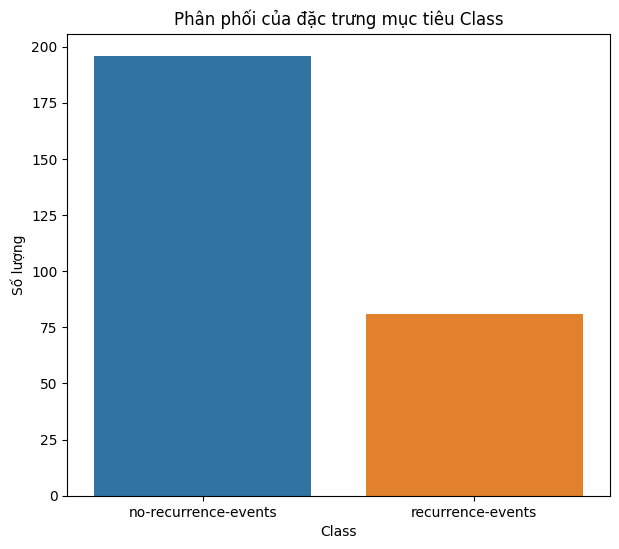

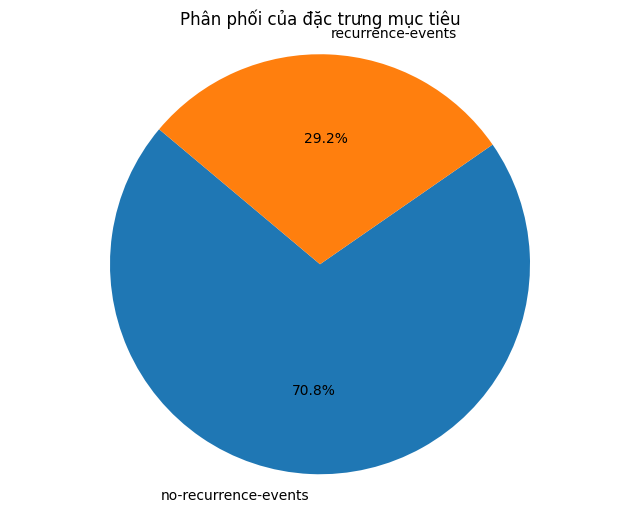

In [4]:
# Biểu diễn theo dạng cột
plt.figure(figsize=(7, 6))
sns.countplot(x='Class', data=data)
plt.title('Phân phối của đặc trưng mục tiêu Class')
plt.xlabel('Class')
plt.ylabel('Số lượng')
plt.show()

#Biểu diễn theo dạng biểu đồ tròn

# Tính toán số lượng của từng nhóm trong cột mục tiêu
class_counts = data['Class'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối của đặc trưng mục tiêu')
plt.axis('equal')  # Đảm bảo biểu đồ tròn không bị méo
plt.show()

### - Biểu đồ phân phối của các đặc trưng còn lại

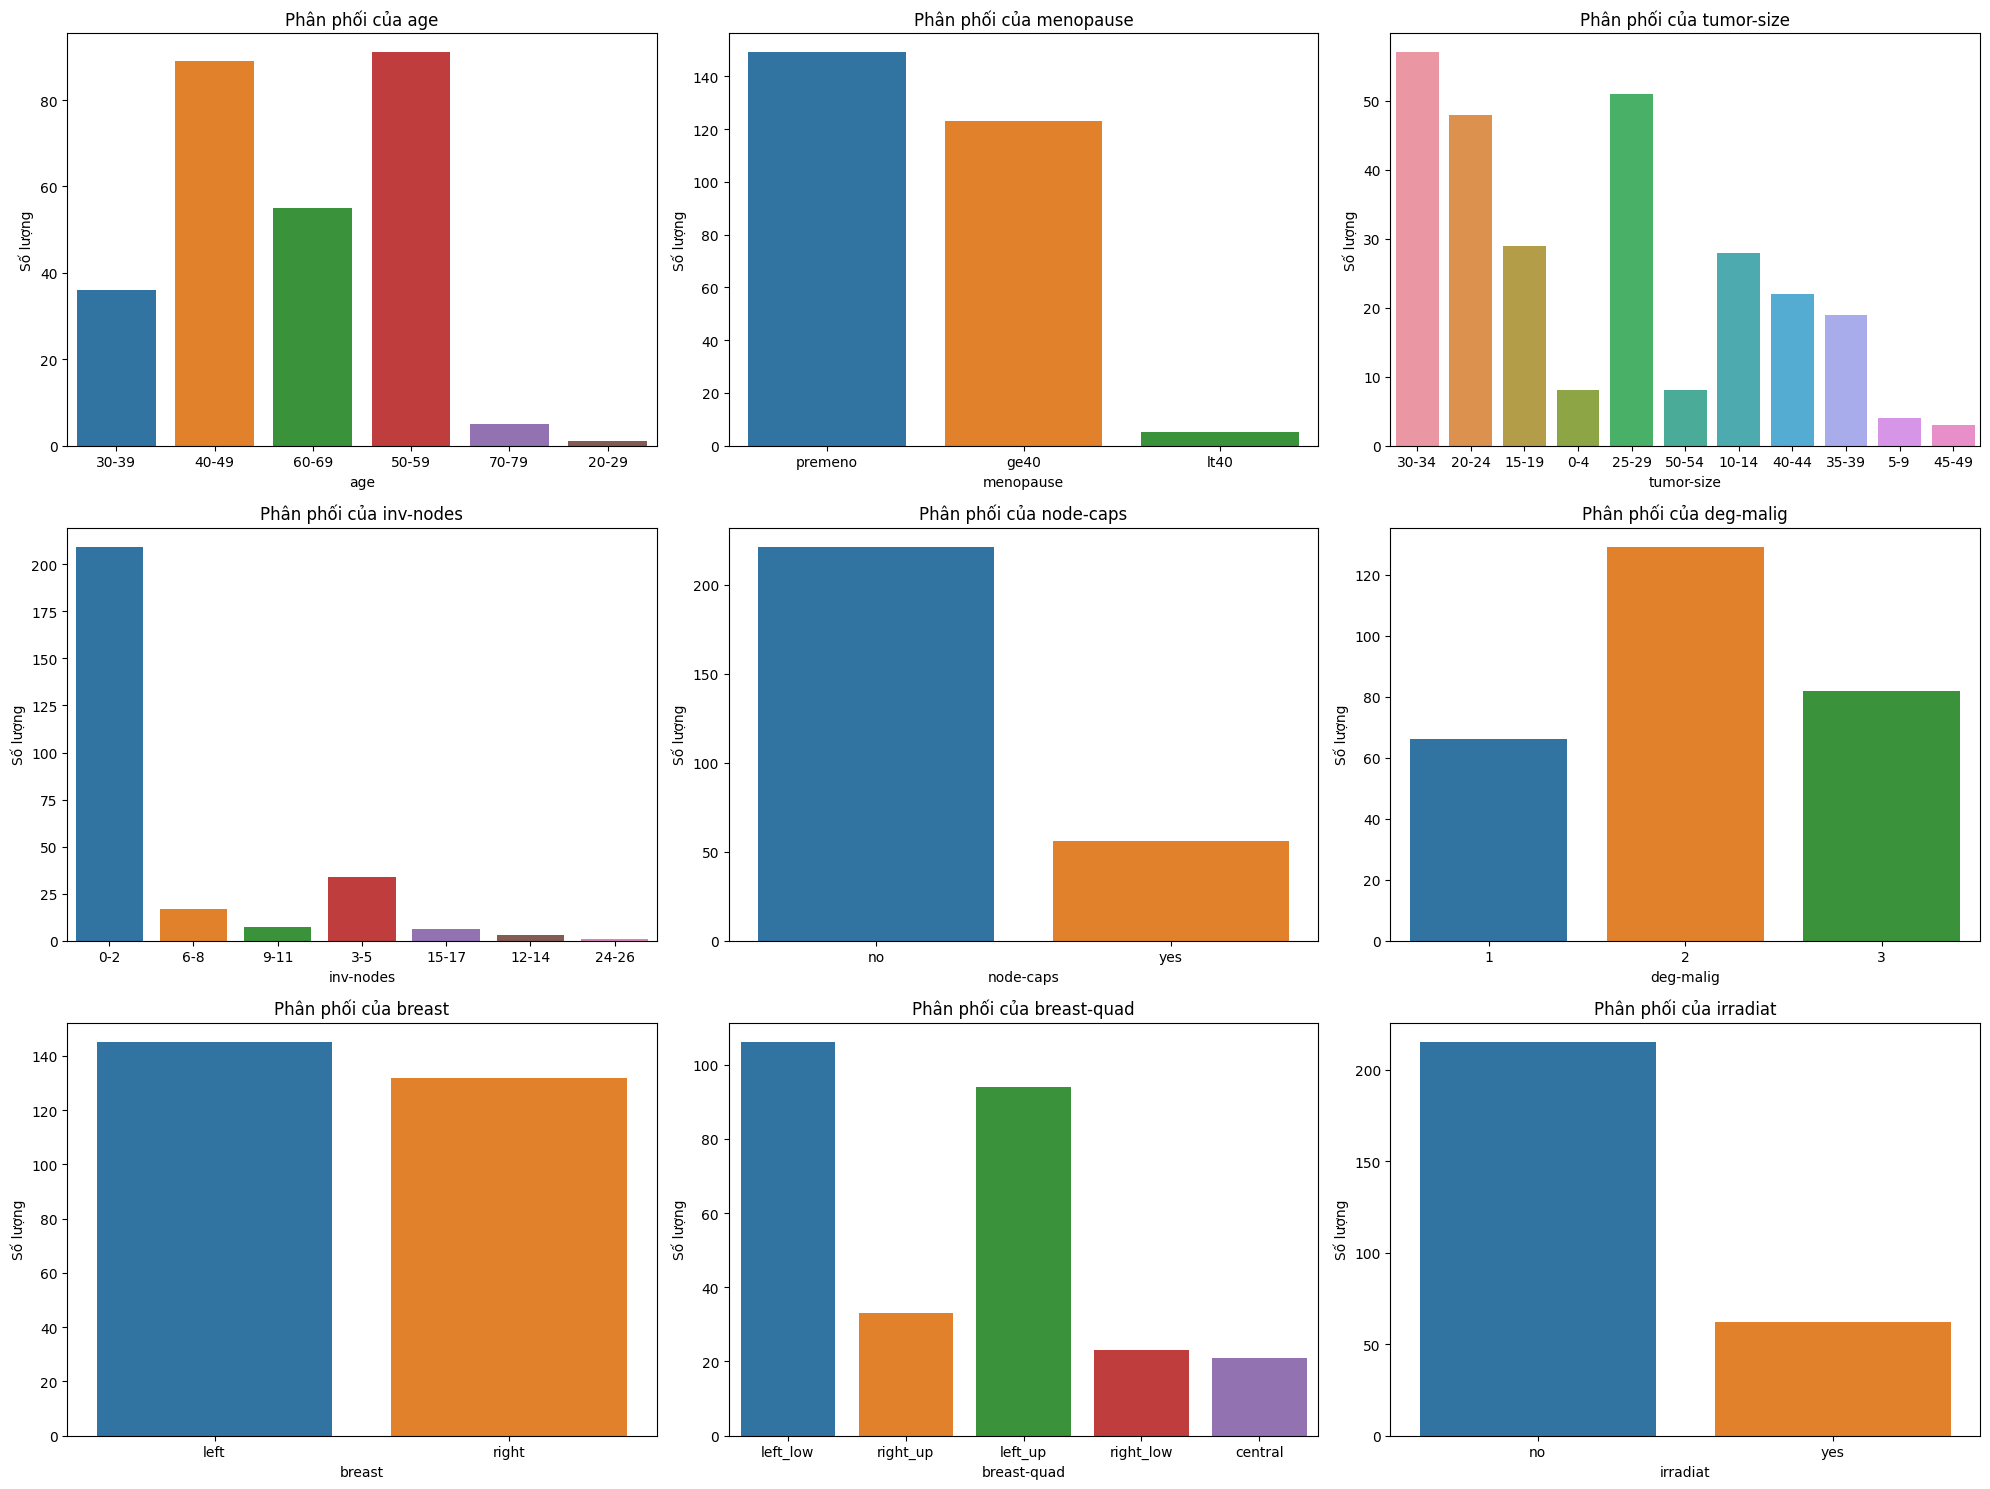

In [5]:
plt.figure(figsize=(20, 15))

# Loop qua từng đặc trưng, vẽ biểu đồ phân phối
for i, column in enumerate(data.columns[1:]):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=column, data=data)
    plt.title(f'Phân phối của {column}')
    plt.xlabel(column)
    plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()


### - Biểu đồ biểu diễn tỉ lệ của các đặc trưng theo đặc trưng mục tiêu (tái phát hoặc không tái phát)

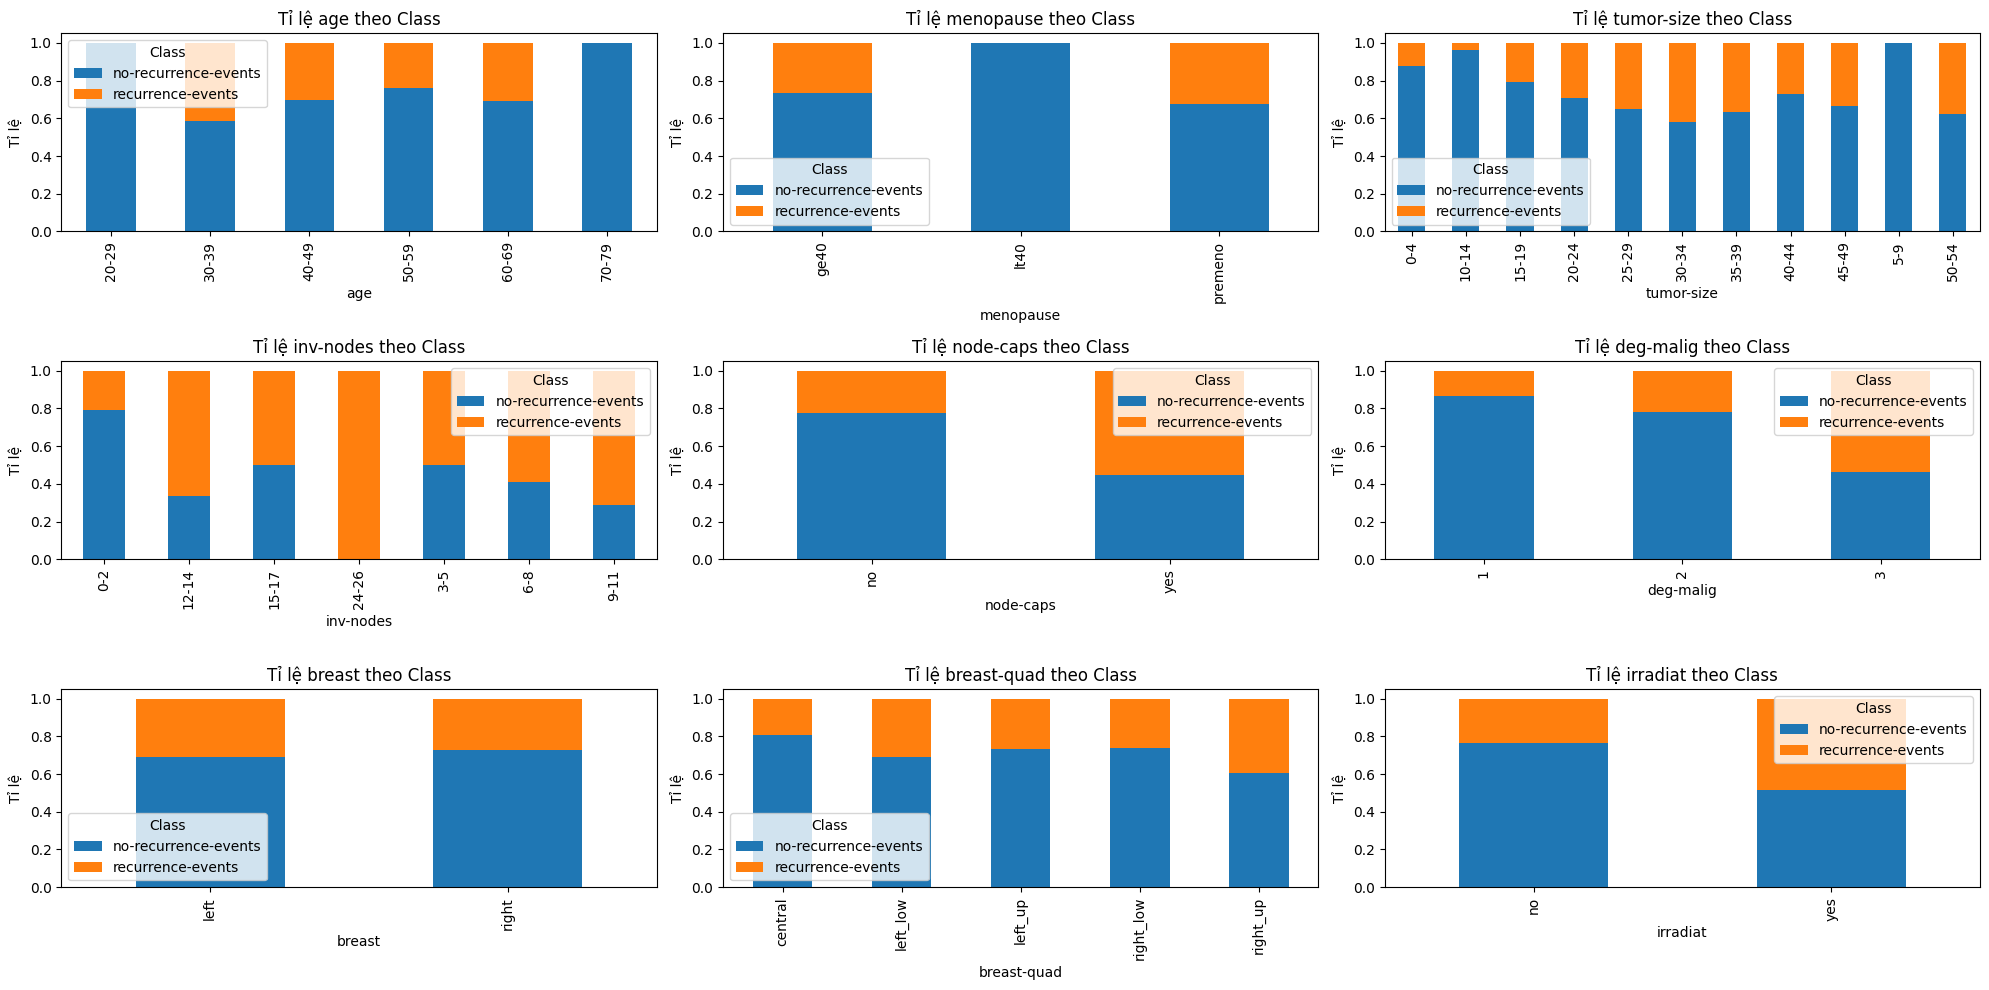

In [6]:
# List các đặc trưng cần vẽ biểu đồ
features = data.columns[1:]

# Vẽ biểu đồ tỉ lệ tái phát và không tái phát của các đặc trưng còn lại
plt.figure(figsize=(20, 10))

for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    feature_counts = data.groupby([feature, 'Class']).size().unstack()
    feature_counts.div(feature_counts.sum(axis=1), axis=0).plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Tỉ lệ {feature} theo Class')
    plt.xlabel(feature)
    plt.ylabel('Tỉ lệ')

plt.tight_layout()
plt.show()


### - Đánh giá vai trò của các đặc trưng với mục tiêu của bài toán bằng cách sử dụng feature_important trong Random Forest Classifier

- Chia dữ liệu thành đặc trưng(X) và mục tiêu(Y)

In [7]:
X = data.iloc[:, 1:]  # Đặc trưng, loại bỏ cột mục tiêu
y = data['Class']  # Nhãn, cột mục tiêu
print(X.shape)
print(y.shape)

(277, 9)
(277,)


- Chuẩn hóa dữ liệu về dạng số

In [8]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [9]:
for col in X.columns:
    if X[col].dtype == 'object':  # Kiểm tra nếu cột là dạng chuỗi
        X[col] = encoder.fit_transform(X[col])
print(X)

     age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0      1          2           5          0          0          3       0   
1      2          2           3          0          0          2       1   
2      2          2           3          0          0          2       0   
3      4          0           2          0          0          2       1   
4      2          2           0          0          0          2       1   
..   ...        ...         ...        ...        ...        ...     ...   
281    1          2           5          0          0          2       0   
282    1          2           3          0          0          3       0   
283    4          0           3          0          0          1       1   
284    2          0           5          4          0          3       0   
285    3          0           5          4          0          3       0   

     breast-quad  irradiat  
0              1         0  
1              4         0  


- Sử dụng feature_importances của mô hình học Random Forest Classifier để tính độ quan trọng của đặc trưng so với mục tiêu (Class) và vẽ biểu đồ thể hiện độ quan trọng đó

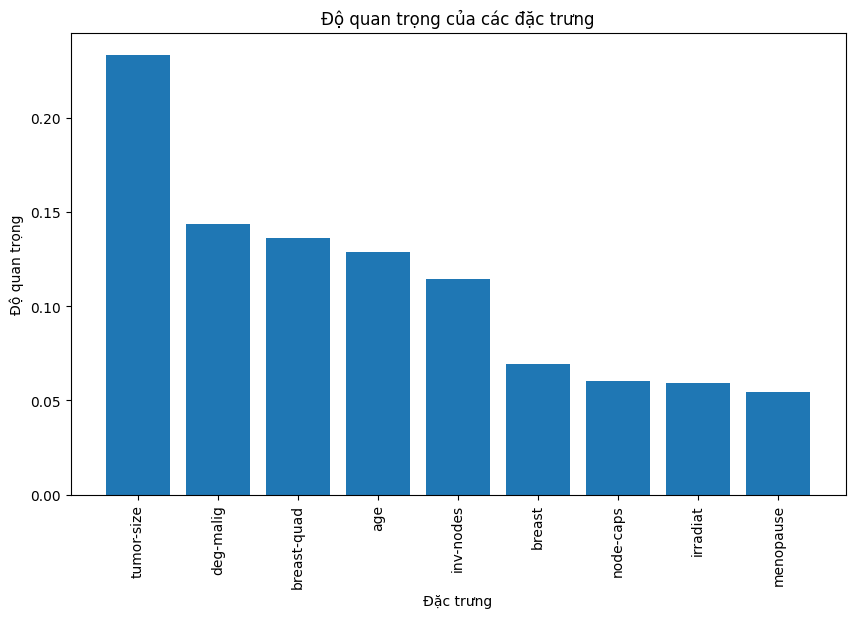

In [10]:
# Khởi tạo mô hình RandomForestClassifier
randomforest_model = RandomForestClassifier(random_state=42)

# Huấn luyện mô hình
randomforest_model.fit(X, y)

# Tính độ quan trọng của các đặc trưng
feature_importances = randomforest_model.feature_importances_

# Sắp xếp các đặc trưng theo độ quan trọng giảm dần
indices = np.argsort(feature_importances)[::-1]

# Biểu đồ cột với độ quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title('Độ quan trọng của các đặc trưng')
plt.xlabel('Đặc trưng')
plt.ylabel('Độ quan trọng')
plt.show()


> Nhìn biểu đồ ta có thể thấy được độ quan trọng của đặc trưng với mục tiêu:
-  Đặc trưng "Kích thước khối u"(tumor-size) có cái trò quan trọng với mục tiêu dự đoán của bài toán
-  Đặc trưng "Tuổi mãn kinh" (menopause) là đặc trưng ít ảnh hưởng đến dự đoán tái phát của khối u

## 2)	Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing;


> Để giải quyết bài toán trên, ta sẽ sử dụng các mô hình học máy sau:
- **Logistic Regression:** Phù hợp cho các bài toán phân loại nhị phân, dễ hiểu và thực hiện. Đây là một lựa chọn tốt cho việc dự đoán xác suất ung thư tái phát dựa trên các đặc trưng y tế.
- **Decision Trees (Cây quyết định):** Mô hình này xây dựng các quy tắc quyết định dựa trên các đặc trưng, có thể dễ dàng hiểu và giải thích.
- **Support Vector Machines (SVM):** Phù hợp để tìm ra ranh giới quyết định tốt giữa các lớp dữ liệu, có thể phù hợp trong việc phân loại dữ liệu ung thư.
- **Naive Bayes:**Dựa trên nguyên lý Bayes, Naive Bayes là một mô hình đơn giản và nhanh chóng, thường hoạt động tốt trên dữ liệu có kích thước lớn.
- **K-Nearest Neighbors (KNN):** Dự đoán dựa trên các điểm dữ liệu láng giềng gần nhất, là một mô hình đơn giản nhưng hiệu quả.
- **Random Forest:** Là một mô hình ensemble của Decision Trees, có khả năng xử lý overfitting và cung cấp hiệu suất tốt.
- **Gradient Boosting:** Cũng một mô hình ensemble,hoạt độngt tốt trên dữ liệu lớn, có khả năng xử lý overfitting và cung cấp hiệu suất tốt, có thể tạo ra các mô hình phức tạp, có khả năng tìm ra các mẫu và mối quan hệ phức tạp trong dữ liệu

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Chuẩn hóa dữ liệu về dạng float để tăng độ chính xác
s_scaler = StandardScaler()
X = s_scaler.fit_transform(X.astype(float))

#Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Khởi tạo và huấn luyện các mô hình cơ bản
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

## Mô hình esemble
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
logistic_pred = logistic_model.predict(X_test)
decision_tree_pred = decision_tree_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
naive_bayes_pred = naive_bayes_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

random_forest_pred = random_forest_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Đánh giá các mô hình
models = {
    "Logistic Regression": logistic_pred,
    "Decision Tree": decision_tree_pred,
    "Support Vector Machines (SVM)": svm_pred,
    "Naive Bayes": naive_bayes_pred,
    "K-Nearest Neighbors (KNN)": knn_pred,
    "Random Forest": random_forest_pred,
    "Gradient Boosting": gb_pred
}

for model_name, pred in models.items():
    accuracy = accuracy_score(y_test, pred)
    print(f"Accuracy of {model_name}: {accuracy:.2f}")
    print(classification_report(y_test, pred))
    print("\n")

Accuracy of Logistic Regression: 0.73
              precision    recall  f1-score   support

           0       0.72      0.96      0.82        56
           1       0.78      0.25      0.38        28

    accuracy                           0.73        84
   macro avg       0.75      0.61      0.60        84
weighted avg       0.74      0.73      0.68        84



Accuracy of Decision Tree: 0.63
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        56
           1       0.45      0.46      0.46        28

    accuracy                           0.63        84
   macro avg       0.59      0.59      0.59        84
weighted avg       0.63      0.63      0.63        84



Accuracy of Support Vector Machines (SVM): 0.70
              precision    recall  f1-score   support

           0       0.70      0.98      0.81        56
           1       0.80      0.14      0.24        28

    accuracy                           0.70        84
   mac

## 3) Sử dụng Feed Forward Neural Network và Reccurent Neural Network (hoặc mô thuộc loại này) để giải quyết bài toán:

### 3.1 Sử dụng Feed Forward Neural Network

- FFNN là một kiến trúc mạng nơ-ron cơ bản, thông thường bao gồm một hoặc nhiều lớp ẩn giữa lớp input và lớp output.
- Dữ liệu chuyển đi theo một hướng, từ input qua các lớp ẩn và cho ra output mà không có chu trình hoặc kết nối phản hồi giữa các đơn vị nơ-ron.
- Các lớp trong FFNN bao gồm lớp input, các lớp ẩn và lớp output. Các đơn vị nơ-ron trong mỗi lớp kết nối với các đơn vị ở lớp tiếp theo.
- Đây là kiến trúc phổ biến trong các nhiệm vụ như phân loại, dự đoán và xử lý dữ liệu có cấu trúc như hình ảnh, văn bản.

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [14]:
#Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(277, 9) (185, 9) (92, 9)


In [16]:
print(y.shape, y_train.shape, y_test.shape)

(277,) (185,) (92,)


In [48]:
from keras.models import Sequential
from keras.layers import Dense

# Khởi tạo mô hình
model_ffnn = Sequential()

# Thêm các layer cho mô hình
model_ffnn.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_ffnn.add(Dense(32, activation='relu'))
model_ffnn.add(Dense(1, activation='sigmoid'))  # Sigmoid cho bài toán nhị phân

# Compile mô hình
model_ffnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model_ffnn.fit(X_train, y_train, epochs=300, batch_size=64, validation_split=0.1)


Epoch 1/300
3/3 [==============================] - 1s 105ms/step - loss: 0.7232 - accuracy: 0.4393 - val_loss: 0.6901 - val_accuracy: 0.4500
Epoch 2/300
3/3 [==============================] - 0s 19ms/step - loss: 0.6884 - accuracy: 0.5434 - val_loss: 0.6576 - val_accuracy: 0.5500
Epoch 3/300
3/3 [==============================] - 0s 19ms/step - loss: 0.6550 - accuracy: 0.6474 - val_loss: 0.6287 - val_accuracy: 0.6000
Epoch 4/300
3/3 [==============================] - 0s 18ms/step - loss: 0.6255 - accuracy: 0.7052 - val_loss: 0.6029 - val_accuracy: 0.7000
Epoch 5/300
3/3 [==============================] - 0s 18ms/step - loss: 0.6021 - accuracy: 0.7514 - val_loss: 0.5787 - val_accuracy: 0.7500
Epoch 6/300
3/3 [==============================] - 0s 26ms/step - loss: 0.5810 - accuracy: 0.7746 - val_loss: 0.5563 - val_accuracy: 0.8500
Epoch 7/300
3/3 [==============================] - 0s 17ms/step - loss: 0.5639 - accuracy: 0.7861 - val_loss: 0.5362 - val_accuracy: 0.8000
Epoch 8/300
3/3 [==

> Trong quá trình huấn luyện mô hình học máy, các giá trị này biểu thị hiệu suất của mô hình:

- Loss (mất mát): Đây là độ đo đánh giá sai lệch giữa giá trị dự đoán và giá trị thực tế. Mục tiêu là giảm thiểu giá trị này, tức là làm cho mô hình dự đoán gần giống với thực tế nhất có thể.

- Accuracy (độ chính xác): Đây là tỷ lệ phần trăm dự đoán chính xác so với tổng số điểm dữ liệu. Ví dụ, nếu accuracy là 0.85, điều này có nghĩa là mô hình dự đoán đúng 85% dữ liệu kiểm thử hoặc dữ liệu không được sử dụng để huấn luyện.

- Val_loss (mất mát trên tập validation): Đây là giá trị mất mát trên tập dữ liệu validation (kiểm thử). Được sử dụng để đánh giá hiệu suất của mô hình trên dữ liệu mà nó chưa từng thấy trong quá trình huấn luyện. Mục tiêu là giảm thiểu val_loss để tránh overfitting.

- Val_accuracy (độ chính xác trên tập validation): Đây là tỷ lệ phần trăm dự đoán chính xác trên tập dữ liệu validation. Val_accuracy cao cũng là mục tiêu, nhưng không nên quá cao so với accuracy trên tập huấn luyện, vì điều này có thể gợi ý về việc mô hình bị overfitting.

> Kết quả cuối cùng của quá trình huấn luyện mô hình thường được đánh giá dựa trên val_accuracy. Trong kết quả trên độ chính xác trên tập huấn luyện khá cao (khoảng 92%) và độ chính xác trên tập validation cũng tốt (khoảng 89%). Điều này cho thấy mô hình của bạn không bị overfitting một cách nghiêm trọng, vẫn còn cơ hội để cải thiện và làm cho mô hình hoạt động tốt hơn trên tập validation nếu cần thiết.







In [49]:
model_ffnn.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 64)                640       
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Vẽ biểu đồ để xem giá trị mất mát và độ chính xác

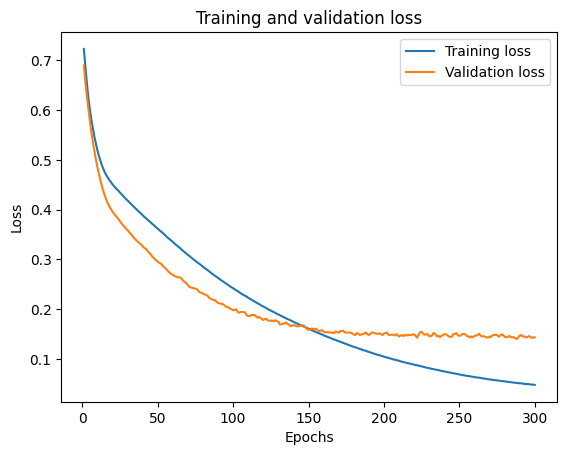

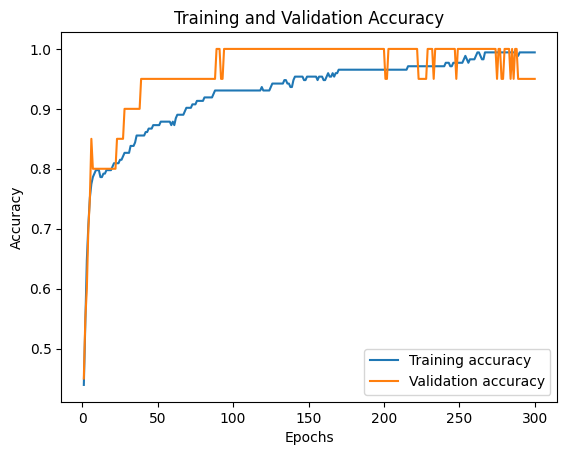

In [50]:
import matplotlib.pyplot as plt

# Lấy thông tin từ history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Vẽ biểu đồ train_loss và val_loss
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Lấy accuracy và val_accuracy từ history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Tạo range cho epochs
epochs = range(1, len(accuracy) + 1)

# Vẽ biểu đồ
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



> Nhận xét: Trong giai đoạn đầu, mô hình học được các đặc điểm tổng quát của dữ liệu và val_loss giảm. Tuy nhiên, sau đó, mô hình bắt đầu học cả các chi tiết nhỏ trong dữ liệu huấn luyện, dẫn đến overfitting. Khi mô hình bắt đầu "nhớ" dữ liệu huấn luyện quá mức, val_loss sẽ tăng trở lại..

In [51]:
#compare actual output values with predicted values
y_pred = model_ffnn.predict(X_test)

# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))


3/3 [==============================] - 0s 5ms/step
MAE: 0.30442537413873216


> Đây là trung bình cộng của giá trị tuyệt đối của sai số (độ lệch) giữa giá trị dự đoán và giá trị thực tế. Việc sử dụng các phép đo này giúp đánh giá độ chính xác của mô hình dự đoán so với dữ liệu thực tế. Các giá trị càng thấp thể hiện mô hình dự đoán tốt hơn.

### 3.2 Sử dụng Reccurent Neural Network

In [31]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Xây dựng mô hình RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=32, input_shape=(X_train.shape[1], 1), activation='relu'))
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile mô hình
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history_rnn = model_rnn.fit(X_train, y_train, epochs=300, batch_size=128, validation_split=0.1)


Epoch 1/300
2/2 [==============================] - 1s 289ms/step - loss: 0.7252 - accuracy: 0.2659 - val_loss: 0.7041 - val_accuracy: 0.3500
Epoch 2/300
2/2 [==============================] - 0s 52ms/step - loss: 0.7167 - accuracy: 0.3064 - val_loss: 0.6976 - val_accuracy: 0.4000
Epoch 3/300
2/2 [==============================] - 0s 52ms/step - loss: 0.7097 - accuracy: 0.4162 - val_loss: 0.6916 - val_accuracy: 0.5500
Epoch 4/300
2/2 [==============================] - 0s 34ms/step - loss: 0.7029 - accuracy: 0.5318 - val_loss: 0.6854 - val_accuracy: 0.6000
Epoch 5/300
2/2 [==============================] - 0s 34ms/step - loss: 0.6968 - accuracy: 0.6069 - val_loss: 0.6796 - val_accuracy: 0.6500
Epoch 6/300
2/2 [==============================] - 0s 39ms/step - loss: 0.6908 - accuracy: 0.6069 - val_loss: 0.6742 - val_accuracy: 0.6500
Epoch 7/300
2/2 [==============================] - 0s 52ms/step - loss: 0.6852 - accuracy: 0.6358 - val_loss: 0.6689 - val_accuracy: 0.6500
Epoch 8/300
2/2 [==

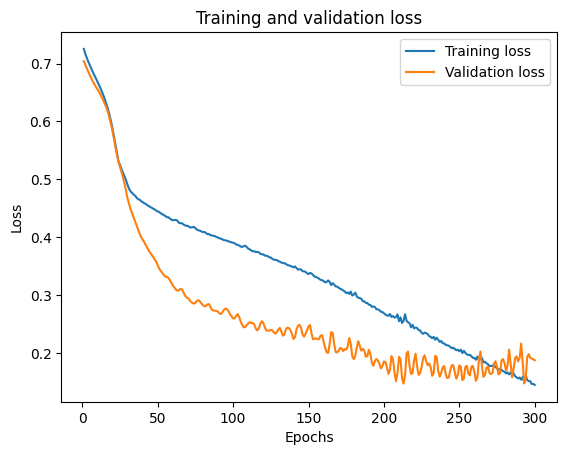

In [32]:
# Lấy thông tin từ history
train_loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Vẽ biểu đồ train_loss và val_loss
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
#compare actual output values with predicted values
y_pred = model_rnn.predict(X_test)

# evaluate the performance of the algorithm (MAE - MSE - RMSE)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))


3/3 [==============================] - 0s 4ms/step
MAE: 0.3318466922057615


##	4)	Áp dụng các kỹ thuật tránh Overfiting trên các mô hình của câu (2) và câu (3) để giải quyết bài toán;

### Áp dụng kỹ thuật tránh OverFitting cho các mô hình ở câu 2


- Logistic Regression: Sử dụng tham số penalty='l2' để áp dụng regularization.
- Decision Tree: Sử dụng các tham số như max_depth, min_samples_split, min_samples_leaf để cắt tỉa cây.
- SVM: Sử dụng tham số C, gamma để điều chỉnh độ phức tạp của mô hình SVM.
- Naive Bayes: Không có hyperparameters cần điều chỉnh trong Naive Bayes.
- K-Nearest Neighbors (KNN): Sử dụng tham số n_neighbors, weights để điều chỉnh độ phức tạp của mô hình.
- Random Forest: Sử dụng các tham số như max_depth, min_samples_split, min_samples_leaf, n_estimators để cắt tỉa cây và giảm thiểu overfitting.
- Gradient Boosting: Sử dụng các tham số như n_estimators, max_depth, learning_rate để giảm thiểu overfitting.

In [25]:
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# xây dựng các mô hình áp dụng các kỹ thuật tránh over fitting
logistic_model = LogisticRegression(penalty='l2', C=1.0)  # Sử dụng L2 regularization
logistic_model.fit(X_train, y_train)

decision_tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)  # Điều chỉnh các tham số của cây
decision_tree_model.fit(X_train, y_train)

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Điều chỉnh tham số của SVM
svm_model.fit(X_train, y_train)

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')  # Điều chỉnh các tham số của KNN
knn_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5)  # Điều chỉnh các tham số của Random Forest
random_forest_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier(n_estimators=50, max_depth=3, learning_rate=0.1)  # Điều chỉnh các tham số của Gradient Boosting
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(n_estimators=50)

In [26]:
#Dự đoán trên tập kiểm tra
logistic_test_pred = logistic_model.predict(X_test)
decision_tree_test_pred = decision_tree_model.predict(X_test)
svm_test_pred = svm_model.predict(X_test)
naive_bayes_test_pred = naive_bayes_model.predict(X_test)
knn_test_pred = knn_model.predict(X_test)
random_forest_test_pred = random_forest_model.predict(X_test)
gb_test_pred = gb_model.predict(X_test)


In [27]:
logistic_train_pred = logistic_model.predict(X_train)
decision_tree_train_pred = decision_tree_model.predict(X_train)
svm_train_pred = svm_model.predict(X_train)
naive_bayes_train_pred = naive_bayes_model.predict(X_train)
knn_train_pred = knn_model.predict(X_train)
random_forest_train_pred = random_forest_model.predict(X_train)
gb_train_pred = gb_model.predict(X_train)

In [28]:
# Sử dụng các model_overfit trong quá trình huấn luyện và kiểm tra
models_overfit_test = {
    "Logistic Regression": logistic_test_pred,
    "Decision Tree": decision_tree_test_pred,
    "Support Vector Machines (SVM)": svm_test_pred,
    "Naive Bayes": naive_bayes_test_pred,
    "K-Nearest Neighbors (KNN)": knn_test_pred,
    "Random Forest": random_forest_test_pred,
    "Gradient Boosting": gb_test_pred
}
models_overfit_train = {
    "Logistic Regression": logistic_train_pred,
    "Decision Tree": decision_tree_train_pred,
    "Support Vector Machines (SVM)": svm_train_pred,
    "Naive Bayes": naive_bayes_train_pred,
    "K-Nearest Neighbors (KNN)": knn_train_pred,
    "Random Forest": random_forest_train_pred,
    "Gradient Boosting": gb_train_pred
}

In [29]:
#Đánh giá kết quả dự đoán trên tập kiểm tra
print(" Kết quả dự đoán trên tập kiểm tra")
for model_name, pred in models_overfit_test.items():
    accuracy = accuracy_score(y_test, pred)
    print(f"Accuracy of {model_name} : {accuracy:.2f}")
#Đánh giá kết quả dự đoán trên tập huấn luyện
print("\n Kết quả dự đoán trên tập huấn luyện")
for model_name, pred in models_overfit_train.items():
    accuracy = accuracy_score(y_train, pred)
    print(f"Accuracy of {model_name} : {accuracy:.2f}")

 Kết quả dự đoán trên tập kiểm tra
Accuracy of Logistic Regression : 0.73
Accuracy of Decision Tree : 0.69
Accuracy of Support Vector Machines (SVM) : 0.70
Accuracy of Naive Bayes : 0.68
Accuracy of K-Nearest Neighbors (KNN) : 0.69
Accuracy of Random Forest : 0.71
Accuracy of Gradient Boosting : 0.64

 Kết quả dự đoán trên tập huấn luyện
Accuracy of Logistic Regression : 0.81
Accuracy of Decision Tree : 0.82
Accuracy of Support Vector Machines (SVM) : 0.85
Accuracy of Naive Bayes : 0.79
Accuracy of K-Nearest Neighbors (KNN) : 0.82
Accuracy of Random Forest : 0.84
Accuracy of Gradient Boosting : 0.91


In [30]:
# Khởi tạo các mô hình
models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": decision_tree_model,
    "Support Vector Machines (SVM)": svm_model,
    "Naive Bayes": naive_bayes_model,
    "K-Nearest Neighbors (KNN)": knn_model,
    "Random Forest": random_forest_model,
    "Gradient Boosting": gb_model
}

# Áp dụng cross-validation cho từng mô hình
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-validated Accuracy of {model_name}: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

Cross-validated Accuracy of Logistic Regression: 0.78 (+/- 0.11)
Cross-validated Accuracy of Decision Tree: 0.73 (+/- 0.05)
Cross-validated Accuracy of Support Vector Machines (SVM): 0.79 (+/- 0.08)
Cross-validated Accuracy of Naive Bayes: 0.78 (+/- 0.07)
Cross-validated Accuracy of K-Nearest Neighbors (KNN): 0.79 (+/- 0.08)
Cross-validated Accuracy of Random Forest: 0.76 (+/- 0.05)
Cross-validated Accuracy of Gradient Boosting: 0.74 (+/- 0.08)


### Áp dụng kỹ thuật tránh OverFitting cho các mô hình ở câu 3

#### Mô hình FFNN

- Dropout:
 - Là một kỹ thuật regularization được sử dụng trong quá trình huấn luyện mô hình neural network. Ý tưởng cơ bản của Dropout là ngẫu nhiên "tắt" một số đơn vị (neurons) trong một layer cho mỗi lượt huấn luyện, có nghĩa là chúng không được sử dụng trong quá trình lan truyền tiến và lan truyền ngược.

 - Ví dụ, nếu chúng ta sử dụng Dropout với tỷ lệ 0.2 cho một layer, thì khoảng 20% các neurons sẽ bị tắt ngẫu nhiên trong mỗi lượt huấn luyện. Điều này giúp mô hình trở nên "ít quá mức nhớ" dữ liệu huấn luyện và hạn chế khả năng overfitting. Khi áp dụng vào quá trình kiểm tra (sau khi huấn luyện), tất cả các neurons sẽ được sử dụng để dự đoán.


- Early Stopping

 - Là một kỹ thuật để ngừng quá trình huấn luyện sớm dựa trên hiệu suất của mô hình trên tập validation set. Thay vì huấn luyện mô hình trong số epochs đã chọn trước đó, early stopping cho phép mô hình dừng khi hiệu suất trên tập validation không còn cải thiện.

 - Quá trình huấn luyện sẽ tiếp tục cho đến khi nó không còn cải thiện trên tập validation trong một số lượng epochs được gọi là "patience". Nếu không có sự cải thiện sau số lượng epochs này, quá trình huấn luyện sẽ dừng và trả về trọng số tốt nhất đã lưu trữ trong quá trình huấn luyện.

 - Early Stopping giúp tránh overfitting bằng cách ngăn chặn mô hình tiếp tục học dữ liệu huấn luyện khi nó bắt đầu học "quá mức" và không còn cải thiện trên tập validation.

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Khởi tạo mô hình
new_model_ffnn = Sequential()

# Thêm các layer cho mô hình
new_model_ffnn.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
new_model_ffnn.add(Dropout(0.2))  # Thêm Dropout layer
new_model_ffnn.add(Dense(32, activation='relu'))
new_model_ffnn.add(Dense(1, activation='sigmoid'))  # Sigmoid cho bài toán nhị phân

# Compile mô hình
new_model_ffnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Áp dụng early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Huấn luyện mô hình với early stopping
new_ffnn_history = new_model_ffnn.fit(X_train, y_train, epochs=300, batch_size=64, validation_split=0.1, callbacks=[early_stopping])


Epoch 1/300
3/3 [==============================] - 2s 175ms/step - loss: 0.7362 - accuracy: 0.4046 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 2/300
3/3 [==============================] - 0s 32ms/step - loss: 0.7141 - accuracy: 0.4913 - val_loss: 0.6637 - val_accuracy: 0.6500
Epoch 3/300
3/3 [==============================] - 0s 37ms/step - loss: 0.6898 - accuracy: 0.5549 - val_loss: 0.6415 - val_accuracy: 0.7000
Epoch 4/300
3/3 [==============================] - 0s 50ms/step - loss: 0.6538 - accuracy: 0.6590 - val_loss: 0.6224 - val_accuracy: 0.7500
Epoch 5/300
3/3 [==============================] - 0s 37ms/step - loss: 0.6145 - accuracy: 0.7168 - val_loss: 0.6066 - val_accuracy: 0.8000
Epoch 6/300
3/3 [==============================] - 0s 38ms/step - loss: 0.6196 - accuracy: 0.7168 - val_loss: 0.5922 - val_accuracy: 0.8500
Epoch 7/300
3/3 [==============================] - 0s 40ms/step - loss: 0.5920 - accuracy: 0.7457 - val_loss: 0.5783 - val_accuracy: 0.8500
Epoch 8/300
3/3 [==

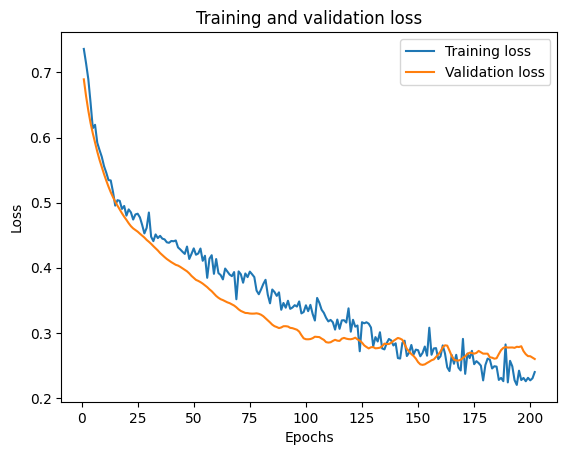

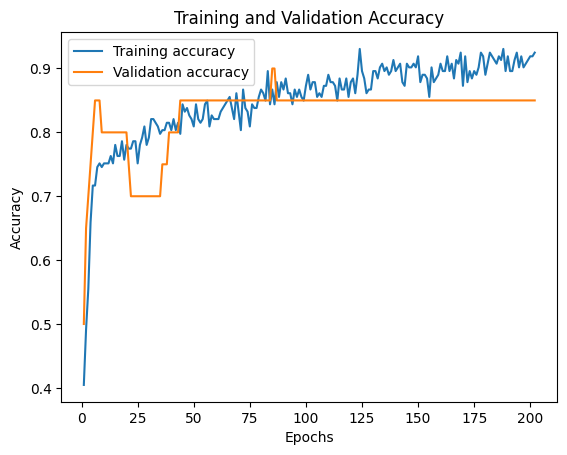

In [58]:
import matplotlib.pyplot as plt

# Lấy thông tin từ history
train_loss = new_ffnn_history.history['loss']
val_loss = new_ffnn_history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Vẽ biểu đồ train_loss và val_loss
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Lấy accuracy và val_accuracy từ history
accuracy = new_ffnn_history.history['accuracy']
val_accuracy = new_ffnn_history.history['val_accuracy']

# Tạo range cho epochs
epochs = range(1, len(accuracy) + 1)

# Vẽ biểu đồ
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [60]:
#compare actual output values with predicted values
y_pred = new_model_ffnn.predict(X_test)

# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))


3/3 [==============================] - 0s 3ms/step
MAE: 0.3150717363155092


#### Mô hình RNN

In [70]:
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=32, input_shape=(X_train.shape[1], 1), activation='relu'))
model_rnn.add(Dropout(0.2))  # Thêm Dropout với tỷ lệ 0.2
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

history_rnn = model_rnn.fit(X_train, y_train, epochs=300, batch_size=64, validation_split=0.1, callbacks=[early_stopping])


Epoch 1/300
3/3 [==============================] - 5s 326ms/step - loss: 0.6453 - accuracy: 0.6879 - val_loss: 0.6448 - val_accuracy: 0.7500
Epoch 2/300
3/3 [==============================] - 0s 21ms/step - loss: 0.6490 - accuracy: 0.7052 - val_loss: 0.6321 - val_accuracy: 0.7500
Epoch 3/300
3/3 [==============================] - 0s 26ms/step - loss: 0.6387 - accuracy: 0.6936 - val_loss: 0.6215 - val_accuracy: 0.7500
Epoch 4/300
3/3 [==============================] - 0s 19ms/step - loss: 0.6168 - accuracy: 0.7225 - val_loss: 0.6126 - val_accuracy: 0.7500
Epoch 5/300
3/3 [==============================] - 0s 28ms/step - loss: 0.6205 - accuracy: 0.6994 - val_loss: 0.6048 - val_accuracy: 0.7500
Epoch 6/300
3/3 [==============================] - 0s 27ms/step - loss: 0.5867 - accuracy: 0.7457 - val_loss: 0.5975 - val_accuracy: 0.7500
Epoch 7/300
3/3 [==============================] - 0s 27ms/step - loss: 0.5796 - accuracy: 0.7399 - val_loss: 0.5907 - val_accuracy: 0.7500
Epoch 8/300
3/3 [==

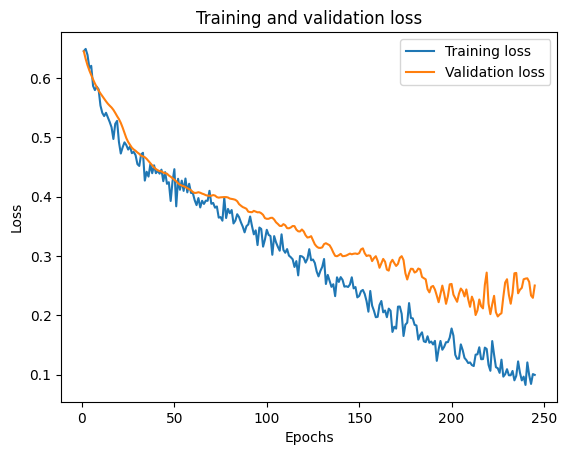

In [71]:
# Lấy thông tin từ history
train_loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Vẽ biểu đồ train_loss và val_loss
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [72]:
#compare actual output values with predicted values
y_pred = model_rnn.predict(X_test)

# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))


3/3 [==============================] - 0s 4ms/step
MAE: 0.3480216089058049
